<a href="https://colab.research.google.com/github/benvictoria17/DataVisualization/blob/master/eda_bankchurners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo pip3 install optuna
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.patches import Ellipse
sns.set()

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix, log_loss
from sklearn.metrics import plot_confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression

import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance
import optuna
import tqdm

     |████████████████████████████████| 308 kB 26.3 MB/s 
     |████████████████████████████████| 80 kB 8.9 MB/s 
     |████████████████████████████████| 209 kB 43.1 MB/s 
     |████████████████████████████████| 75 kB 3.5 MB/s 
     |████████████████████████████████| 112 kB 55.8 MB/s 
     |████████████████████████████████| 148 kB 54.9 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=e99f426cd1a0f2104b43c69c914a07e11fcca585bba40f479086ace35a906ae4
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Credit%20Card%20customers/BankChurners.csv')

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
print('This bank has {} users'.format(df['CLIENTNUM'].nunique()))

This bank has 10127 users


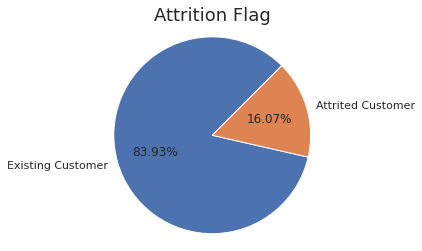

In [7]:
fig, ax = plt.subplots()
ax.pie(df['Attrition_Flag'].value_counts().values, labels = df['Attrition_Flag'].value_counts().index, autopct = '%1.2f%%', shadow = False, startangle = 45)
ax.axis('equal')
plt.title('Attrition Flag', loc = 'center', fontsize = 18)
plt.show()

In [8]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



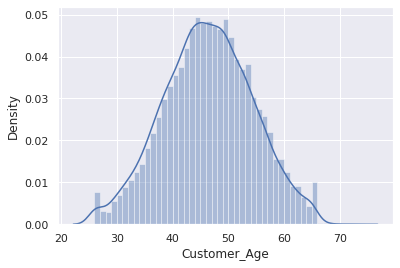

In [9]:
sns.distplot(df['Customer_Age'])

In [10]:
print('The youngest customer is {} year old'.format(df['Customer_Age'].min()),
      'The oldest customer is {} year old'.format(df['Customer_Age'].max()),
      'The average customer age is {:.2f} year old'.format(df['Customer_Age'].mean()),
     sep = '\n'
     )

The youngest customer is 26 year old
The oldest customer is 73 year old
The average customer age is 46.33 year old


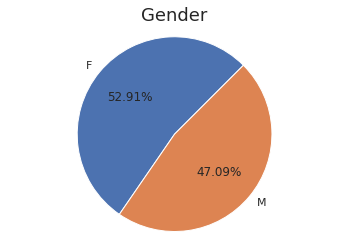

In [11]:
fig, ax = plt.subplots()
ax.pie(df['Gender'].value_counts().values, labels = df['Gender'].value_counts().index, autopct = '%1.2f%%', shadow = False, startangle = 45)
ax.axis('equal')
plt.title('Gender', loc = 'center', fontsize = 18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



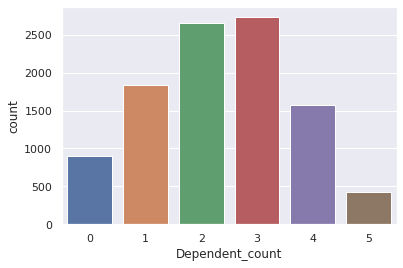

In [12]:
df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1})
sns.countplot(df['Dependent_count'])

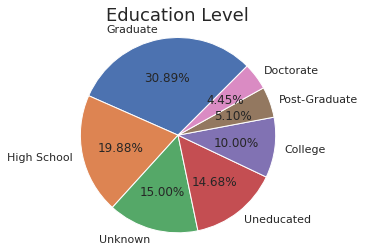

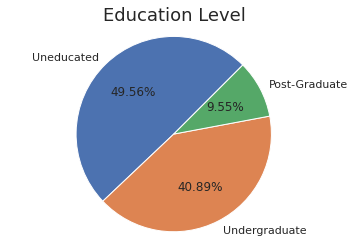

In [13]:
fig, ax = plt.subplots()
ax.pie(df['Education_Level'].value_counts().values, labels = df['Education_Level'].value_counts().index, autopct = '%1.2f%%', shadow = False, startangle = 45)
ax.axis('equal')
plt.title('Education Level', loc = 'center', fontsize = 18)
plt.show()
df['Education_Level'] = df['Education_Level'].replace({'Uneducated': 0, 'Unknown': 0, 'High School': 0,
                                                       'Graduate': 1, 'College': 1, 'Post-Graduate': 2,
                                                       'Doctorate': 2})
fig, ax = plt.subplots()
ax.pie(df['Education_Level'].value_counts().values, labels = ['Uneducated', 'Undergraduate', 'Post-Graduate'], autopct = '%1.2f%%', shadow = False, startangle = 45)
ax.axis('equal')
plt.title('Education Level', loc = 'center', fontsize = 18)
plt.show()

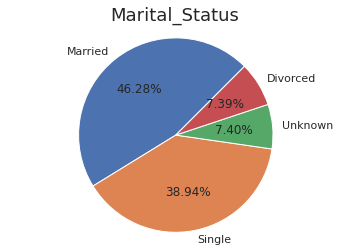

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



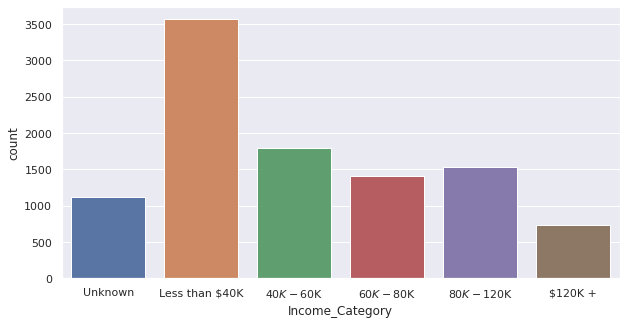

In [14]:
fig, ax = plt.subplots()
ax.pie(df['Marital_Status'].value_counts().values, labels = df['Marital_Status'].value_counts().index, autopct = '%1.2f%%', shadow = False, startangle = 45)
ax.axis('equal')
plt.title('Marital_Status', loc = 'center', fontsize = 18)
plt.show()
df['Marital_Status'] = df['Marital_Status'].replace({'Single': 0, 'Unknown': 0, 'Divorced': 0, 'Married': 1})
plt.figure(figsize = (10,5))
sns.countplot(df['Income_Category'], order = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', 
                                              '$80K - $120K', '$120K +'])

Blue card -> 9436 users = 93.18%
Silver card -> 555 users = 5.48%
Gold card -> 116 users = 1.15%
Platinum card -> 20 users = 0.20%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Frequency')

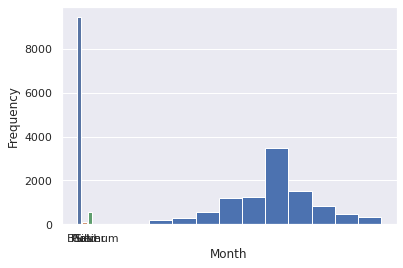

In [15]:
df['Income_Category'] = df['Income_Category'].replace({'Unknown': 0, 'Less than $40K': 0, '$40K - $60K': 1,
                                                      '$60K - $80K': 2, '$80K - $120K': 3, '$120K +': 4})
sns.countplot(df['Card_Category'])
card_count = df['Card_Category'].value_counts()
print('Blue card -> {} users = {:.2f}%'.format(card_count['Blue'], card_count['Blue']/10127*100),
      'Silver card -> {} users = {:.2f}%'.format(card_count['Silver'], card_count['Silver']/10127*100),
      'Gold card -> {} users = {:.2f}%'.format(card_count['Gold'], card_count['Gold']/10127*100),
      'Platinum card -> {} users = {:.2f}%'.format(card_count['Platinum'], card_count['Platinum']/10127*100), sep = '\n')
df['Card_Category'] = df['Card_Category'].replace({'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3})
plt.hist(df['Months_on_book'])
plt.xlabel('Month')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Frequency')

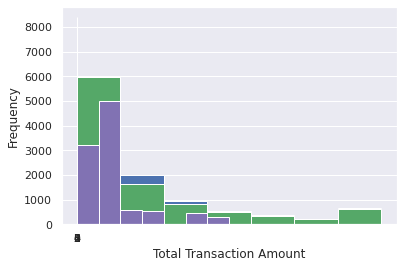

In [16]:
sns.countplot(df['Total_Relationship_Count'], palette = 'flare')
sns.countplot(df['Months_Inactive_12_mon'], palette = 'flare')
sns.countplot(df['Contacts_Count_12_mon'], palette = 'flare')
plt.hist(df['Credit_Limit'], bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000])
plt.xlabel('Credit_Limit')
plt.ylabel('Frequency')
plt.hist(df['Total_Revolving_Bal'])
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.hist(df['Avg_Open_To_Buy'], bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000])
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.hist(df['Total_Amt_Chng_Q4_Q1'], bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5])
plt.xlabel('Total Amount Change')
plt.ylabel('Frequency')
plt.hist(df['Total_Trans_Amt'], bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500])
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

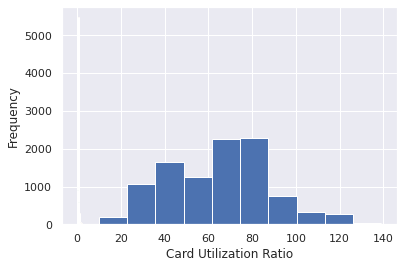

In [17]:
plt.hist(df['Total_Trans_Ct'])
plt.xlabel('Total Transaction Count')
plt.ylabel('Frequency')
plt.hist(df['Total_Ct_Chng_Q4_Q1'])
plt.xlabel('Change in Transaction Count')
plt.ylabel('Frequency')
plt.hist(df['Avg_Utilization_Ratio'])
plt.xlabel('Card Utilization Ratio')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



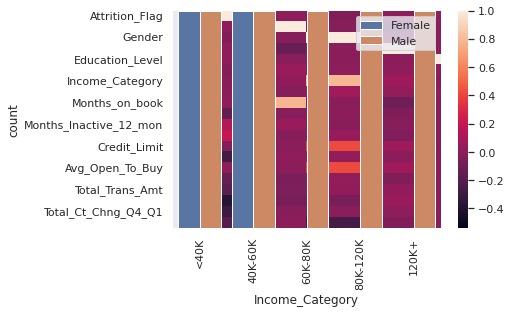

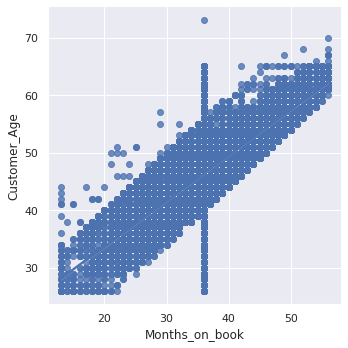

In [18]:
features = df.columns[1:21].tolist()
corr = df[features].corr()
sns.heatmap(corr)
col = {}
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i, j] >= 0.75:
            name = str(features[i]) + ' - ' + str(features[j])
            col[name] = corr.iloc[i, j]
col
sns.countplot(df['Income_Category'].replace({0 : '<40K', 1 : '40K-60K', 2 : '60K-80K', 3 : '80K-120K', 4 : '120K+'}), hue = df['Gender'], 
                                            order = ['<40K', '40K-60K', '60K-80K', '80K-120K', '120K+'])
plt.legend(labels = ['Female', 'Male'])
sns.lmplot('Months_on_book', 'Customer_Age', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



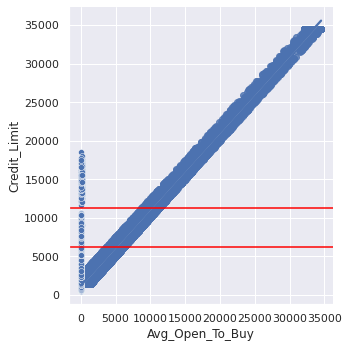

In [19]:
sns.lmplot('Avg_Open_To_Buy', 'Credit_Limit', data = df)
a = sns.scatterplot('Total_Trans_Ct', 'Total_Trans_Amt', data = df)
a.axhline(6250, color = 'red')
a.axhline(11250, color = 'red')

features = [col for col in features if col not in ['Months_on_book', 'Avg_Open_To_Buy', 'Attrition_Flag']]
features
num_features = ['Customer_Age', 'Credit_Limit','Total_Relationship_Count', 'Months_Inactive_12_mon', 
                'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
scalar = StandardScaler()
df[num_features] = scalar.fit_transform(df[num_features])
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42, stratify = df['Attrition_Flag'])

In [20]:
kf = KFold(5 , shuffle = True, random_state = 3)
N_TRIALS = 10 # Number of trials to find best hyperparameters
TIME = 3600 * 6
def objective(trial, cv = kf):
   
    lgbm_params = {
        'random_state': 42,
        'objective' : 'binary',
        #'scale_pos_weight' : 5.22, 
        'metric' : 'logloss',
        'n_estimators': trial.suggest_int('n_estimators', 100, 5000),
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss']),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.9),
        'max_depth': trial.suggest_int('max_depth', 2,30),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
        'subsample': trial.suggest_float('subsample', 0.5, 0.9)
    }
    
    val_loss = []
    
    for kfold, (train_idx, val_idx) in tqdm.tqdm(enumerate(cv.split(train_df[features], train_df['Attrition_Flag']))):
        
        X_train = train_df.iloc[train_idx][features]
        y_train = train_df.iloc[train_idx]['Attrition_Flag']
    
        X_valid = train_df.iloc[val_idx][features]
        y_valid = train_df.iloc[val_idx]['Attrition_Flag']

        model = LGBMClassifier(**lgbm_params)      
        model.fit(X_train, y_train, eval_set = [(X_valid, y_valid)], 
                  eval_metric = 'logloss', early_stopping_rounds = 300, verbose = False)
        preds_valid = model.predict_proba(X_valid)[:, 1]
        score = log_loss(y_valid, preds_valid)
        val_loss.append(score)
    
    return np.average(val_loss)
def perf_model():
    study = optuna.create_study(study_name = 'parameter_opt', direction = 'minimize',
                                pruner = optuna.pruners.MedianPruner(n_warmup_steps = 25))
    study.optimize(objective, n_trials = N_TRIALS, 
                   timeout = TIME, show_progress_bar = True) 
    
    trial = study.best_trial
    
    print("  Value: {}".format(trial.value))
    
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
    
    return trial.params
lgb_best_params = perf_model()
lgbm_final_model = LGBMClassifier(**lgb_best_params)
lgbm_final_model.fit(train_df[features], train_df['Attrition_Flag'])
lgbm_preds_test = lgbm_final_model.predict_proba(test_df[features])[:, 1]
score = roc_auc_score(test_df['Attrition_Flag'], lgbm_preds_test)
print('Test score (AUC) : {}'.format(score))

[I 2021-11-13 17:21:35,194] A new study created in memory with name: parameter_opt
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/10 [00:00<?, ?it/s]


0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


1it [00:07,  7.69s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


2it [00:15,  7.62s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


3it [00:22,  7.51s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


4it [00:30,  7.53s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


5it [00:37,  7.58s/it]


[I 2021-11-13 17:22:13,206] Trial 0 finished with value: 0.0883698739616499 and parameters: {'n_estimators': 970, 'boosting_type': 'dart', 'learning_rate': 0.47498007569751716, 'max_depth': 3, 'colsample_bytree': 0.8477265623038412, 'subsample': 0.7948509680013462}. Best is trial 0 with value: 0.0883698739616499.



0it [00:00, ?it/s]
1it [00:00,  2.85it/s]
2it [00:00,  2.80it/s]
3it [00:01,  2.77it/s]
4it [00:01,  2.79it/s]
5it [00:01,  2.77it/s]


[I 2021-11-13 17:22:15,044] Trial 1 finished with value: 0.08483018597739769 and parameters: {'n_estimators': 240, 'boosting_type': 'gbdt', 'learning_rate': 0.6107492156245067, 'max_depth': 5, 'colsample_bytree': 0.6746872978713881, 'subsample': 0.7722769833849545}. Best is trial 1 with value: 0.08483018597739769.



0it [00:00, ?it/s]
1it [00:00,  1.66it/s]
2it [00:01,  1.64it/s]
3it [00:01,  1.57it/s]
4it [00:02,  1.57it/s]
5it [00:03,  1.58it/s]


[I 2021-11-13 17:22:18,243] Trial 2 finished with value: 0.07755875029642526 and parameters: {'n_estimators': 3251, 'boosting_type': 'gbdt', 'learning_rate': 0.29774916261817735, 'max_depth': 13, 'colsample_bytree': 0.6745340669575391, 'subsample': 0.7809902587924813}. Best is trial 2 with value: 0.07755875029642526.



0it [00:00, ?it/s]
1it [00:00,  1.87it/s]
2it [00:01,  1.79it/s]
3it [00:01,  1.79it/s]
4it [00:02,  1.82it/s]
5it [00:02,  1.81it/s]


[I 2021-11-13 17:22:21,028] Trial 3 finished with value: 0.08419401441577987 and parameters: {'n_estimators': 462, 'boosting_type': 'goss', 'learning_rate': 0.5396967291356646, 'max_depth': 26, 'colsample_bytree': 0.6849918985248251, 'subsample': 0.6699711939690817}. Best is trial 2 with value: 0.07755875029642526.



0it [00:00, ?it/s]
1it [00:00,  1.42it/s]
2it [00:01,  1.45it/s]
3it [00:02,  1.42it/s]
4it [00:02,  1.41it/s]
5it [00:03,  1.41it/s]


[I 2021-11-13 17:22:24,615] Trial 4 finished with value: 0.07673911502274229 and parameters: {'n_estimators': 1801, 'boosting_type': 'gbdt', 'learning_rate': 0.26111164830393835, 'max_depth': 16, 'colsample_bytree': 0.8184454985655811, 'subsample': 0.614591595410378}. Best is trial 4 with value: 0.07673911502274229.



0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


1it [00:39, 39.89s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


2it [01:20, 40.09s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


3it [02:00, 40.21s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


4it [02:41, 40.46s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


5it [03:20, 40.07s/it]


[I 2021-11-13 17:25:44,994] Trial 5 finished with value: 0.12965604226379482 and parameters: {'n_estimators': 1985, 'boosting_type': 'dart', 'learning_rate': 0.1421611874476145, 'max_depth': 28, 'colsample_bytree': 0.67361298427096, 'subsample': 0.5477149807046447}. Best is trial 4 with value: 0.07673911502274229.



0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


1it [01:13, 73.03s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


2it [02:24, 71.89s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


3it [03:33, 70.94s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


4it [04:45, 71.21s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


5it [05:57, 71.42s/it]


[I 2021-11-13 17:31:42,117] Trial 6 finished with value: 0.2059311210613858 and parameters: {'n_estimators': 4487, 'boosting_type': 'dart', 'learning_rate': 0.7333509137118158, 'max_depth': 14, 'colsample_bytree': 0.6750177973168504, 'subsample': 0.8557647646741064}. Best is trial 4 with value: 0.07673911502274229.



0it [00:00, ?it/s]
1it [00:00,  1.92it/s]
2it [00:01,  2.01it/s]
3it [00:01,  1.84it/s]
4it [00:02,  1.75it/s]
5it [00:02,  1.82it/s]


[I 2021-11-13 17:31:44,898] Trial 7 finished with value: 0.07577747357180842 and parameters: {'n_estimators': 2386, 'boosting_type': 'goss', 'learning_rate': 0.3664284499418486, 'max_depth': 4, 'colsample_bytree': 0.5630484631264837, 'subsample': 0.5386429205518876}. Best is trial 7 with value: 0.07577747357180842.



0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


1it [01:09, 69.28s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


2it [02:15, 67.22s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


3it [03:21, 67.03s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


4it [04:30, 67.62s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode


5it [05:38, 67.67s/it]


[I 2021-11-13 17:37:23,301] Trial 8 finished with value: 0.17591066843934966 and parameters: {'n_estimators': 3455, 'boosting_type': 'dart', 'learning_rate': 0.35131726163752397, 'max_depth': 23, 'colsample_bytree': 0.8054529038061824, 'subsample': 0.7450152210910848}. Best is trial 7 with value: 0.07577747357180842.



0it [00:00, ?it/s]
1it [00:00,  2.16it/s]
2it [00:00,  2.16it/s]
3it [00:01,  2.12it/s]
4it [00:01,  2.11it/s]
5it [00:02,  2.10it/s]


[I 2021-11-13 17:37:25,708] Trial 9 finished with value: 0.09635966876944838 and parameters: {'n_estimators': 1476, 'boosting_type': 'gbdt', 'learning_rate': 0.7007108909169525, 'max_depth': 15, 'colsample_bytree': 0.8305712816350403, 'subsample': 0.7791299477864516}. Best is trial 7 with value: 0.07577747357180842.
  Value: 0.07577747357180842
  Params: 
    n_estimators: 2386
    boosting_type: goss
    learning_rate: 0.3664284499418486
    max_depth: 4
    colsample_bytree: 0.5630484631264837
    subsample: 0.5386429205518876
Test score (AUC) : 0.9906100483878261


Best Threshold=0.000518, G-Mean=0.955


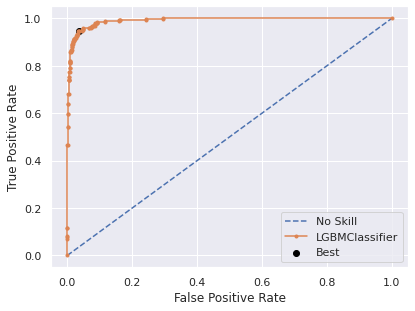

In [21]:
def plot_roc(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    # calculate the g-mean for each threshold
    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    # plot the roc curve for the model
    plt.figure(num=0, figsize=[6.4, 4.8])
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='LGBMClassifier')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    # show the plot
    plt.show()
    return thresholds, ix
    
lgbm_thresholds, lgbm_ix = plot_roc(test_df['Attrition_Flag'], lgbm_preds_test)

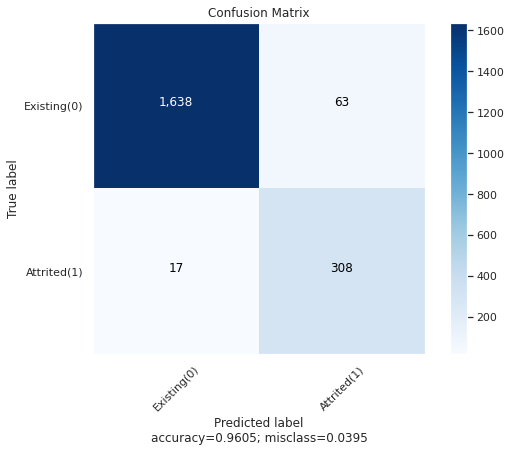

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1701
           1       0.83      0.95      0.89       325

    accuracy                           0.96      2026
   macro avg       0.91      0.96      0.93      2026
weighted avg       0.96      0.96      0.96      2026

Accuracy: 96.05%
Recall: 94.77%


In [22]:

def plot_confusion_matrix_kaggle(cm, target_names, title='Confusion matrix', cmap = None, normalize = True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.grid(False)
    plt.show()
    
# binarize an array based of a threshold 
def binarizeArray(array,threshold = 0.5):
    return [0 if num < threshold else 1 for num in array]
#%% Plot Confusion Matrix with best threshold
lgbm_pref_y_bin = binarizeArray(lgbm_preds_test, lgbm_thresholds[lgbm_ix])
cm = confusion_matrix(test_df['Attrition_Flag'], lgbm_pref_y_bin)
plot_confusion_matrix_kaggle(cm = cm, normalize = False, target_names = ['Existing(0)', 'Attrited(1)'], title = "Confusion Matrix")
print(classification_report(test_df['Attrition_Flag'],lgbm_pref_y_bin))
print("Accuracy: %.2f%%" % ((cm[0][0]+cm[1][1])/cm.sum() * 100.0))
print("Recall: %.2f%%" % (cm[1][1]/(cm[1][1]+cm[1][0]) * 100.0))

In [23]:
def objective(trial, cv = kf):
   
    xgb_params = {
        'random_state': 42,
        'objective': 'binary:logistic',
        #'scale_pos_weight' : 5.22, 
        'eval_metric' : 'logloss',
        'n_estimators': trial.suggest_int('n_estimators', 100,5000),
        'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.9),
        'max_depth': trial.suggest_int('max_depth', 2,30),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
        'subsample': trial.suggest_float('subsample', 0.5, 0.9)
    }
    
    val_loss = []
    
    for kfold, (train_idx, val_idx) in tqdm.tqdm(enumerate(cv.split(train_df[features], train_df['Attrition_Flag']))):
        
        X_train = train_df.iloc[train_idx][features]
        y_train = train_df.iloc[train_idx]['Attrition_Flag']
    
        X_valid = train_df.iloc[val_idx][features]
        y_valid = train_df.iloc[val_idx]['Attrition_Flag']
        
        model = XGBClassifier(**xgb_params)      
        model.fit(X_train, y_train, eval_set = [(X_valid, y_valid)], 
                  eval_metric = 'logloss', early_stopping_rounds = 300, verbose = False)
        preds_valid = model.predict_proba(X_valid)[:, 1]
        score = log_loss(y_valid, preds_valid)
        val_loss.append(score)
    
    return np.average(val_loss)
xgb_best_params = perf_model()

[I 2021-11-13 17:41:15,474] A new study created in memory with name: parameter_opt
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/10 [00:00<?, ?it/s]


0it [00:00, ?it/s]
1it [00:26, 26.17s/it]
2it [00:49, 24.24s/it]
3it [01:11, 23.50s/it]
4it [01:36, 23.84s/it]
5it [01:59, 23.94s/it]


[I 2021-11-13 17:43:15,245] Trial 0 finished with value: 0.11179367986467674 and parameters: {'n_estimators': 2873, 'booster': 'dart', 'learning_rate': 0.8913799190254087, 'max_depth': 25, 'colsample_bytree': 0.6975489017394285, 'subsample': 0.5331430963322044}. Best is trial 0 with value: 0.11179367986467674.



0it [00:00, ?it/s]
1it [00:32, 32.91s/it]
2it [00:59, 29.25s/it]
3it [01:32, 30.98s/it]
4it [02:03, 31.08s/it]
5it [02:36, 31.28s/it]


[I 2021-11-13 17:45:51,654] Trial 1 finished with value: 0.08708861657733101 and parameters: {'n_estimators': 4678, 'booster': 'dart', 'learning_rate': 0.49912142224929984, 'max_depth': 16, 'colsample_bytree': 0.7768732351401588, 'subsample': 0.6409507572929634}. Best is trial 1 with value: 0.08708861657733101.



0it [00:00, ?it/s]
1it [00:35, 35.95s/it]
2it [01:02, 30.32s/it]
3it [01:51, 38.71s/it]
4it [02:18, 34.19s/it]
5it [02:49, 33.90s/it]


[I 2021-11-13 17:48:41,172] Trial 2 finished with value: 0.0899228000993387 and parameters: {'n_estimators': 1353, 'booster': 'dart', 'learning_rate': 0.5546957347080282, 'max_depth': 19, 'colsample_bytree': 0.7243299747266088, 'subsample': 0.6207711145338679}. Best is trial 1 with value: 0.08708861657733101.



0it [00:00, ?it/s]
1it [00:02,  2.57s/it]
2it [00:05,  2.53s/it]
3it [00:07,  2.55s/it]
4it [00:10,  2.67s/it]
5it [00:13,  2.61s/it]


[I 2021-11-13 17:48:54,248] Trial 3 finished with value: 0.09087520944831476 and parameters: {'n_estimators': 4655, 'booster': 'gbtree', 'learning_rate': 0.6639229524400979, 'max_depth': 19, 'colsample_bytree': 0.7800095428519223, 'subsample': 0.599687818191978}. Best is trial 1 with value: 0.08708861657733101.



0it [00:00, ?it/s]
1it [00:02,  2.41s/it]
2it [00:04,  2.36s/it]
3it [00:07,  2.39s/it]
4it [00:09,  2.39s/it]
5it [00:12,  2.41s/it]


[I 2021-11-13 17:49:06,308] Trial 4 finished with value: 0.1099394081654124 and parameters: {'n_estimators': 1429, 'booster': 'gbtree', 'learning_rate': 0.8468820663084257, 'max_depth': 17, 'colsample_bytree': 0.8239456302657036, 'subsample': 0.5203638551345574}. Best is trial 1 with value: 0.08708861657733101.



0it [00:00, ?it/s]
1it [00:27, 27.90s/it]
2it [00:53, 26.42s/it]
3it [01:21, 27.26s/it]
4it [01:48, 27.02s/it]
5it [02:15, 27.01s/it]


[I 2021-11-13 17:51:21,371] Trial 5 finished with value: 0.08770679043230513 and parameters: {'n_estimators': 1465, 'booster': 'dart', 'learning_rate': 0.5812408390413426, 'max_depth': 21, 'colsample_bytree': 0.8862556777572501, 'subsample': 0.7263746686723925}. Best is trial 1 with value: 0.08708861657733101.



0it [00:00, ?it/s]
1it [00:42, 42.24s/it]
2it [01:14, 36.28s/it]
3it [01:59, 40.22s/it]
4it [02:32, 37.28s/it]
5it [03:05, 37.19s/it]


[I 2021-11-13 17:54:27,355] Trial 6 finished with value: 0.08552186190936475 and parameters: {'n_estimators': 1055, 'booster': 'dart', 'learning_rate': 0.4105242428289168, 'max_depth': 20, 'colsample_bytree': 0.5461241050551024, 'subsample': 0.6461688101561432}. Best is trial 6 with value: 0.08552186190936475.



0it [00:00, ?it/s]
1it [00:10, 10.55s/it]
2it [00:19,  9.74s/it]
3it [00:31, 10.58s/it]
4it [00:42, 10.90s/it]
5it [00:54, 10.85s/it]


[I 2021-11-13 17:55:21,638] Trial 7 finished with value: 0.07378958152744479 and parameters: {'n_estimators': 3998, 'booster': 'gbtree', 'learning_rate': 0.025335514562528708, 'max_depth': 8, 'colsample_bytree': 0.7991021756017431, 'subsample': 0.500035160423793}. Best is trial 7 with value: 0.07378958152744479.



0it [00:00, ?it/s]
1it [03:15, 195.77s/it]
2it [05:55, 174.36s/it]
3it [10:14, 213.33s/it]
4it [13:56, 216.67s/it]
5it [16:45, 201.00s/it]


[I 2021-11-13 18:12:06,671] Trial 8 finished with value: 0.07382172054043948 and parameters: {'n_estimators': 2577, 'booster': 'dart', 'learning_rate': 0.038203042677301534, 'max_depth': 14, 'colsample_bytree': 0.8209444432866191, 'subsample': 0.5596948793456563}. Best is trial 7 with value: 0.07378958152744479.



0it [00:00, ?it/s]
1it [00:22, 22.97s/it]
2it [00:46, 23.03s/it]
3it [01:08, 22.93s/it]
4it [01:33, 23.50s/it]
5it [01:57, 23.46s/it]


[I 2021-11-13 18:14:04,018] Trial 9 finished with value: 0.10293704765273606 and parameters: {'n_estimators': 969, 'booster': 'dart', 'learning_rate': 0.8736734225081968, 'max_depth': 19, 'colsample_bytree': 0.8997900266240708, 'subsample': 0.7284055670838255}. Best is trial 7 with value: 0.07378958152744479.
  Value: 0.07378958152744479
  Params: 
    n_estimators: 3998
    booster: gbtree
    learning_rate: 0.025335514562528708
    max_depth: 8
    colsample_bytree: 0.7991021756017431
    subsample: 0.500035160423793


Test score : (AUC) 0.9909048975715642
Best Threshold=0.023548, G-Mean=0.956


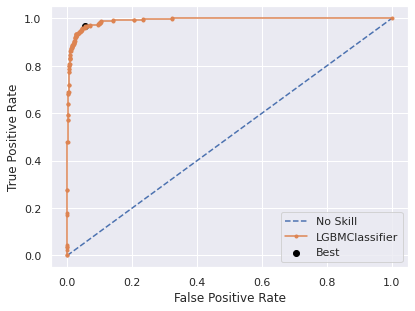

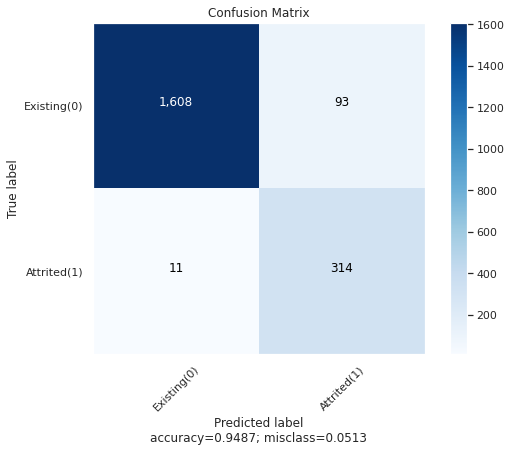

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1701
           1       0.77      0.97      0.86       325

    accuracy                           0.95      2026
   macro avg       0.88      0.96      0.91      2026
weighted avg       0.96      0.95      0.95      2026

Accuracy: 94.87%
Recall: 96.62%
Best Threshold=0.019038, G-Mean=0.957


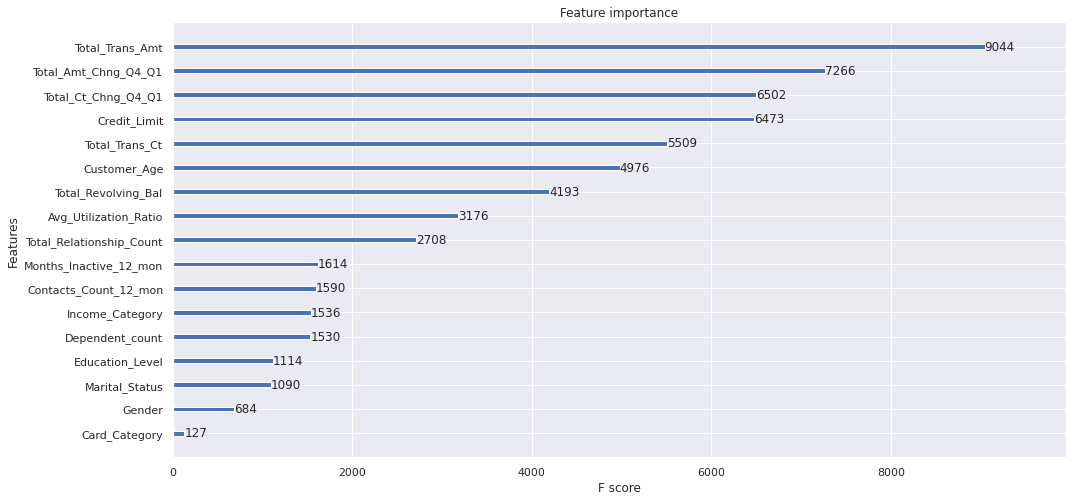

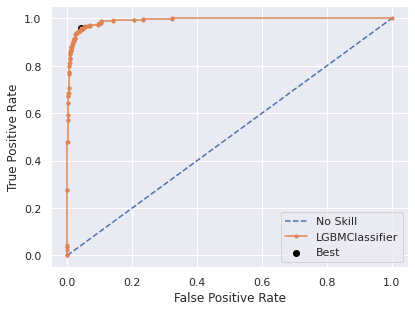

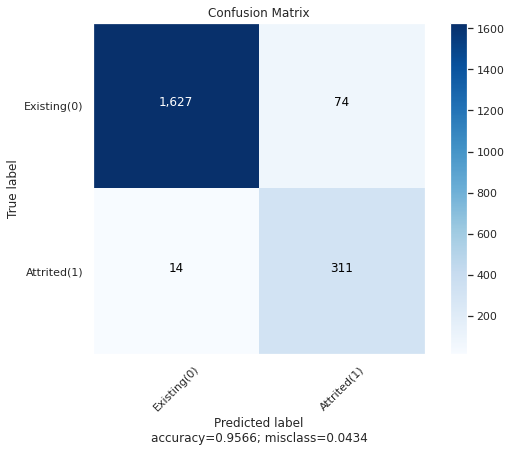

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1701
           1       0.77      0.97      0.86       325

    accuracy                           0.95      2026
   macro avg       0.88      0.96      0.91      2026
weighted avg       0.96      0.95      0.95      2026

Accuracy: 95.66%
Recall: 95.69%


In [24]:
xgb_final_model = XGBClassifier(**xgb_best_params)
xgb_final_model.fit(train_df[features], train_df['Attrition_Flag'])
xgb_preds_test = xgb_final_model.predict_proba(test_df[features])[:,1]
score = roc_auc_score(test_df['Attrition_Flag'], xgb_preds_test)
print('Test score : (AUC) {}'.format(score))
xgb_thresholds, xgb_ix = plot_roc(test_df['Attrition_Flag'], xgb_preds_test)

xgb_pref_y_bin = binarizeArray(xgb_preds_test, xgb_thresholds[xgb_ix])
cm = confusion_matrix(test_df['Attrition_Flag'], xgb_pref_y_bin)
plot_confusion_matrix_kaggle(cm = cm, normalize = False, target_names = ['Existing(0)', 'Attrited(1)'], title = "Confusion Matrix")
print(classification_report(test_df['Attrition_Flag'],xgb_pref_y_bin))
print("Accuracy: %.2f%%" % ((cm[0][0]+cm[1][1])/cm.sum() * 100.0))
print("Recall: %.2f%%" % (cm[1][1]/(cm[1][1]+cm[1][0]) * 100.0))
fig, ax = plt.subplots(figsize=(16,8))
plot_importance(xgb_final_model, ax = ax)
all_preds = (0.5*lgbm_preds_test + 0.5*xgb_preds_test)
all_thresholds, all_ix = plot_roc(test_df['Attrition_Flag'], all_preds)

all_pref_y_bin = binarizeArray(all_preds, all_thresholds[all_ix])
cm = confusion_matrix(test_df['Attrition_Flag'], all_pref_y_bin)
plot_confusion_matrix_kaggle(cm = cm, normalize = False, target_names = ['Existing(0)', 'Attrited(1)'], title = "Confusion Matrix")
print(classification_report(test_df['Attrition_Flag'],xgb_pref_y_bin))
print("Accuracy: %.2f%%" % ((cm[0][0]+cm[1][1])/cm.sum() * 100.0))
print("Recall: %.2f%%" % (cm[1][1]/(cm[1][1]+cm[1][0]) * 100.0))